In [1]:
from IPython.core.display import HTML, Image
css_file = 'material/msc/custom.css' 
HTML(open(css_file, 'r').read())

# Public Package 

Let us consider the different roles we play when estimating the generalized Roy model in our research.

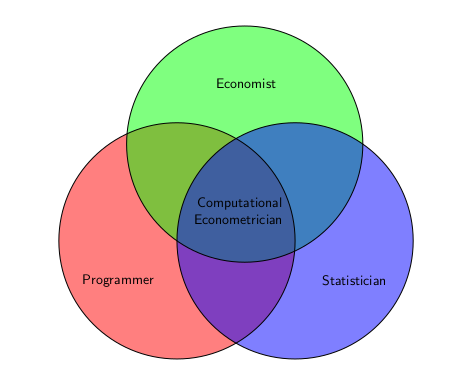

In [2]:
Image(filename='material/images/venn_diagram.png', width=1000)

The *grmpy*  packate can be used to estimate the benefits, cost, and surplus using your own data and using simulated data. 

    Eisenhauer, Philipp and James Heckman, Edward Vytlacil (2014): The Generalized Roy Model and the Cost-Benefit Analysis of Social Programs, Journal of Political Economy, 123(2): 413-443.


There are two functions: (1) estimate and (2) simulate.

The grmpy package includes a sample dataset, 'test.dat', and a sample init file 'test.ini' that are included to provide an example of how the two functions work.

This tutorial reviews using both function with those sample files.

## Model

## Initialization File

We use an initialization file to specify the model.

```
DATA
	source		../data/test.dat
	agents 		10000

	outcome		0
	treatment	1

BENE
        
	coeff  2  0.00	0.00	false
	coeff  3  0.00	0.00	true

	coeff  4  0.00	0.00	true
	
	int       0.00	0.00
	sd        1.00	1.00

COST

	coeff  4  0.00
	coeff  5  0.00
	
	int       0.00
	sd        !1.00

RHO

	 treated   0.0
	 untreated   0.0

ESTIMATION
	
	algorithm 	bfgs
	maxiter    	15
	start		manual
	gtol       	1e-05

	epsilon    	1.4901161193847656e-08
	differences	one-sided

	asymptotics true
	hessian    	numdiff

	draws    	1000
	alpha		0.05

	version     fast

SIMULATION

	agents		1747
	seed 	  	123
	target  	simulation.dat

```

## Getting Started

You can incorporate the *grmpy* package's functions in any python project after first importing it just as you would any other python library

In [3]:
# Edits to PYTHONPATH
import sys
sys.path.insert(0, '../')
sys.path.insert(0, 'material/modules')

# Import grmpy package
import grmpy

# Let us run some basic tests
grmpy.test()

# Import some auxiliary functions
import auxiliary as aux

# Import parts of scientific computing stack
import numpy as np

# Import Python object serialization
import pickle as pkl

# Plotting 
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


There is only a limited number of tests distributed as part of the package [(sources)](https://github.com/grmToolbox/public.package/blob/master/grmpy/tests/test.py). However, we have many more tests set up as part of our development process [(sources)](https://github.com/grmToolbox/public.package/tree/master/testing).

We briefly reproduce the interface to the *estimate* function.

In [ ]:
def estimate(init='init.ini', resume=False, use_simulation=False):
    """
            Parameters
            ----------
            
                init: str, optional
                    Path to the initialization file.
                    
                resume: bool, optional
                    Restart estimation, requires info.grmpy.out.
                    
                use_simulation: bool, optional
                    Use information from SIMULATION section of 
                    the initialiation file.
                
            Results
            -------
            
                info.grmpy.out: file
                    Text file with results from estimation run.
                    
                rslt.grmpy.pkl: serialized Python object    
                    Results from estimation run.
    """
    
    pass


For any initialization file, you can simulate a dataset for the specified data generating process. This is  useful to inspect properties of the simulated population but also testing the reliability of your estimator. Also, if information from a previous estimation run is available the estimated structural parameters can be used for the simulation.

Here we reproduce the interface to the *simulate* function.

In [ ]:
def simulate(init='init.ini', update=False):
    """
            Parameters
            ----------
            
                init: str, optional
                    Path to the initialization file.
                    
                update: bool, optional
                    Update structural parameters from info.grmpy.out.
                                    
            Results
            -------
            
                simulation.infos.grmpy.out
                    Text file with basic information on 
                    simulated economy.
                    
                *.dat
                    Text file with simulated dataset. The file
                    name is determined by the target flag in 
                    the SIMULATION section of the initalization 
                    file.
                
    """
    
    pass


## Basic Workflow

We now run through the basic workflow. First, we simulate a dataset as specificed in the initialization file and then run an estimation run. 

### Simulation

In [ ]:
# Simulate dataset
grmpy.simulate('example.grmpy.ini')

# Inspect the results. 
%cat simulation.infos.grmpy.out

Some basic descriptives about the simulated dataset are provided such as the distribution of agents across the different treatment states and the average observed outcomes within each treatment group. Also, the value of the criterion function
at the true parameter values is printed out. To easily check the performance of the estimator later, we also print the true parameter values used in the simulation. 

### Estimation

In [ ]:
# Estimate model
grmpy.estimate('example.grmpy.ini', use_simulation=True)

# Inspect the rparas_objesults
%cat info.grmpy.out

At the beginning, the file contains some information about the optimization process such as start and stop values and a report from the optimizer. Also, the parametrc estimates for the marginal effects of treatment are written out.

In [ ]:
str_ = '{0:10.2f}{1:10.2f}{2:10.2f}{3:10.2f}'

START, STOP, TRUE = aux.get_parameters()

print '\n      START     STOP      TRUE      DIFF\n'

for i in range(len(STOP)):

    print str_.format(START[i], STOP[i], TRUE[i], np.abs(STOP[i] - TRUE[i]))


### Visualization

To ease further processing, some information is also stored in the *rslt.grmpy.pkl* object. For example, it contains the point estimates and confidence bounds (if requested) for the marginal effect parameters. 

In [ ]:
# Load serialized dictionary with result
# information.
rslt_dict = pkl.load(open('rslt.grmpy.pkl', 'r'))

# Extract the marginal effects of treatment at the
# average of relevant observable characteristics.
# Note that at the points of evaluation the ex ante
# and ex post versions of the marginal benefits of
# treatment are identical.
bmte = rslt_dict['bmte_ex_post']['estimate']
cmte = rslt_dict['cmte_ex_ante']['estimate']
smte = rslt_dict['smte_ex_ante']['estimate']

# The confidence intervals can be accessed by 
# accessing the `confi' key.

These can be used to create visual representation of the marginal effects of treatment.

In [ ]:
aux.graph_marginal_effects(bmte, cmte, smte)

For alternative points of evaluation, the results from the estimation run need to be processed for further processing (stored in *info.grmpy.out*).

## Monte Carlo Exercise

Let us assume we just finished estimation run on actual data. What is a good way to gain some confidence in your results and communicate it to your fellow researchers? I use the following Monte Carlo Exercise:

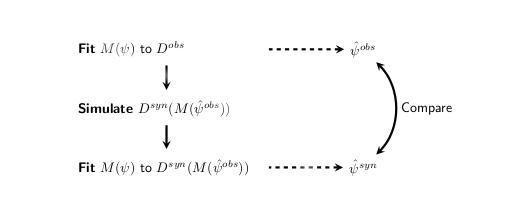

In [4]:
Image(filename='material/images/monte_carlo.png', width=1000)

$M(\psi)$ denotes the structural model parametrized by $\psi$, which is fit to the observed data $D_obs$ to produce an estimated set of parameters $\psi_{obs}$. Using the initial estimates as the parametrization for the Monte Carlo exercise ensures that important features of the data-generating process, such as unobserved variability in agent behaviors and outcomes, are accounted for.
In Step 2, it is crucial to follow the same estimation approach applied to the original data as closely as possible, for example, choice of starting values. This exercise showcases the performance of the estimator in a favorable setting as the model is correctly specified. If the structural parameters $\psi_{syn}$ are successfully recovered, this is encouraging but does not provide a definite proof of the performance in the observed data. A failure, however, offers reason for concern.
Given the design of the toolbox, implementing the idea is straightforward. Of course, this is not by accident.
Let us start with a baseline estimation.